In [72]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

In [73]:
(x_train,y_train), (x_test,y_test) = keras.datasets.mnist.load_data()

Sample images and their output of training dataset: 
5
0
4
1
9


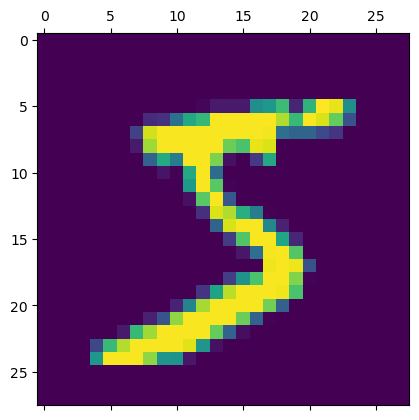

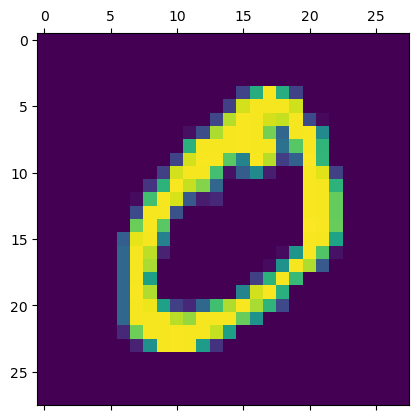

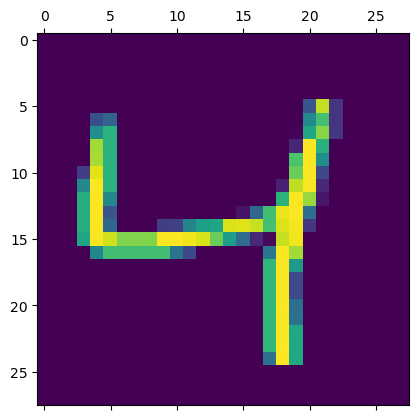

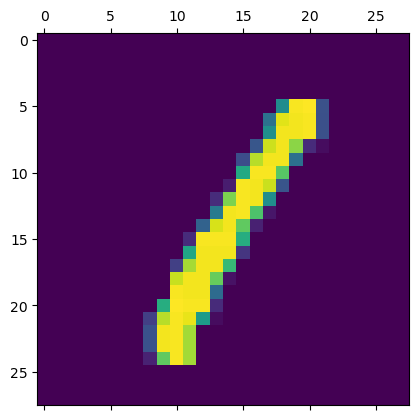

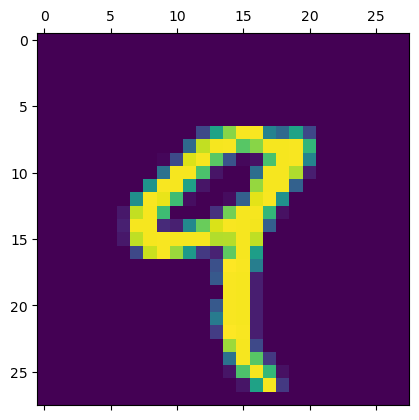

In [74]:
print("Sample images and their output of training dataset: ")
for i in range(5):
    plt.matshow(x_train[i])
    print(y_train[i])

Sample images and their output of testing dataset: 
7
2
1
0
4


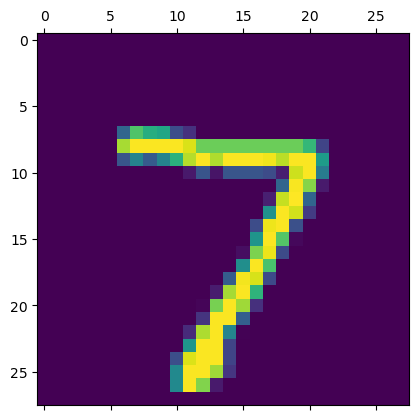

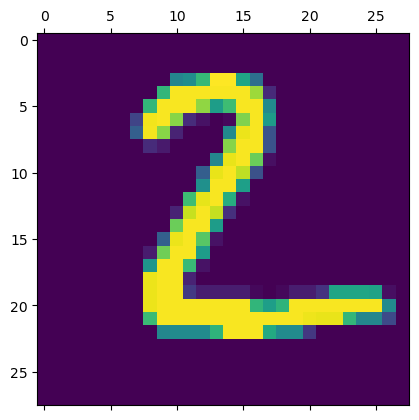

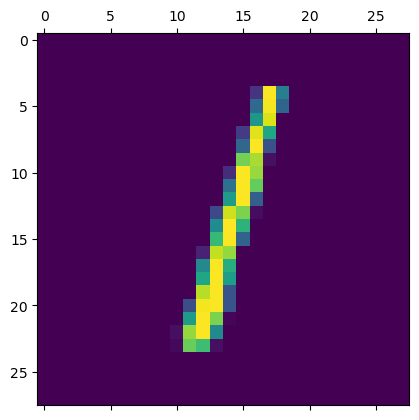

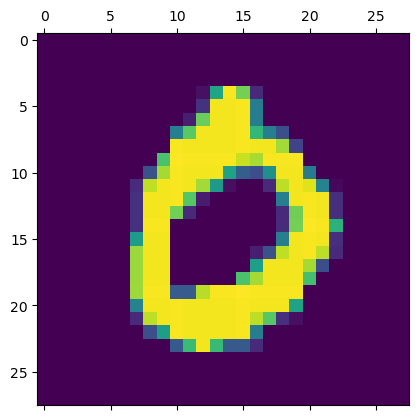

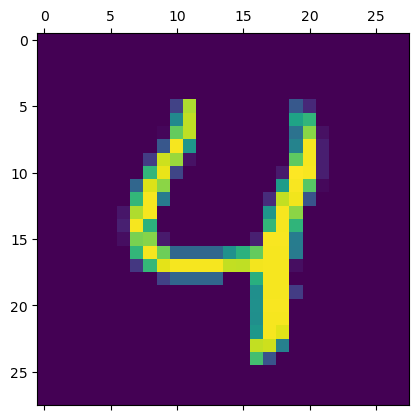

In [75]:
print("Sample images and their output of testing dataset: ")
for i in range(5):
    plt.matshow(x_test[i])
    print(y_test[i])

In [76]:
print("Length of x_train", len(x_train))
print("Length of y_train", len(y_train))
print("Length of x_test", len(x_test))
print("Length of y_test", len(y_test))

Length of x_train 60000
Length of y_train 60000
Length of x_test 10000
Length of y_test 10000


In [77]:
# Shape of training and testing data
print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of x_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


In [78]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

It is in 2D array, so we will need to flatten it. The value 0 and 255 corresponds with color. O is black and 255 means white. color between them represents the contrast of color. Along with that high gap between 0 and 255 can affect the accuray. so the values are needed to be converted between 0 and 1.

In [79]:
x_train = x_train/255
x_test = x_test/255

In [80]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Shape of x_train:  (60000, 28, 28)
Shape of x_test:  (60000, 28, 28)
Well initially the shape of training and testing data is 60000 that is the size of images and 2 dimensions, 28*28 but we want 1D array to feed data to computer. So we will be flattenning it to 1D array.

In [81]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [82]:
print("Shape of Flattened x_train: ",x_train_flattened.shape)
print("Shape of Flattened x_test: ",x_test_flattened.shape)

Shape of Flattebed x_train:  (60000, 784)
Shape of Flattened x_test:  (10000, 784)


# Model Training

In [83]:
model = Sequential([
    Dense(10, input_shape = (784,), activation = "sigmoid")
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=100)

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 204us/step - accuracy: 0.8158 - loss: 0.7177
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 227us/step - accuracy: 0.9150 - loss: 0.3076
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.9212 - loss: 0.2842
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9229 - loss: 0.2740
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9276 - loss: 0.2639
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 200us/step - accuracy: 0.9255 - loss: 0.2656
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 201us/step - accuracy: 0.9301 - loss: 0.2528
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9293 - loss: 0.2573
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9294 - loss: 0.2524
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 193us/step - accuracy: 0.9333 - loss: 0.2453
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.9313 - loss: 0.24

In [84]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 206us/step - accuracy: 0.9146 - loss: 0.3380


[0.30243322253227234, 0.9233999848365784]

In [90]:
pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 215us/step


2


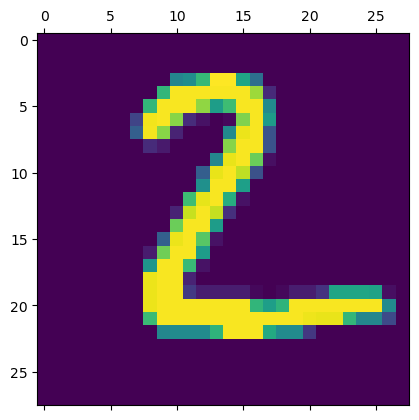

In [91]:
plt.matshow(x_test[1])
print(y_test[1])

In [92]:
pred_5 = [np.argmax(i) for i in pred]

In [96]:
pred_5[:15]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1]

In [95]:
y_test[:15]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1], dtype=uint8)

In [98]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = pred_5)

Text(120.72222222222221, 0.5, 'Truth')

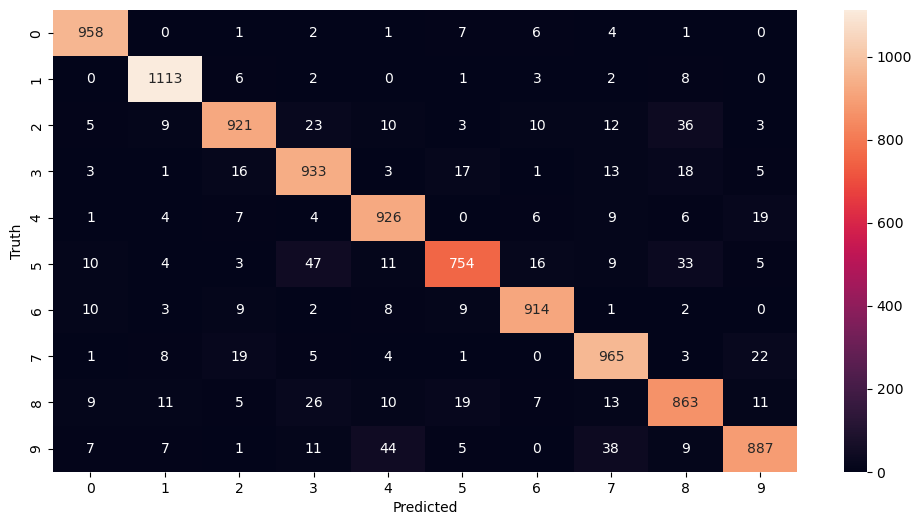

In [100]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Multi Layer

In [104]:
model = Sequential([
    Dense(100, input_shape = (784,), activation = "relu"),
    Dense(10, activation = "sigmoid")
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(x_train_flattened,y_train,epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.8746 - loss: 0.4541
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 465us/step - accuracy: 0.9598 - loss: 0.1338
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9744 - loss: 0.0860
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.9814 - loss: 0.0625
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9857 - loss: 0.0477
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.9892 - loss: 0.0375
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.9901 - loss: 0.0328
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.9924 - loss: 0.0259
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.9942 - loss: 0.0213
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.9950 - loss: 0.0172
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.9951 - loss: 0.0157
Epoch 12

# Model Evaluation

In [109]:
model.evaluate(x_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9714 - loss: 0.1174


[0.09644690901041031, 0.9768999814987183]

In [110]:
new_pred = model.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step


In [111]:
new_pred_con = [np.argmax(i) for i in new_pred]

Text(120.72222222222221, 0.5, 'Truth')

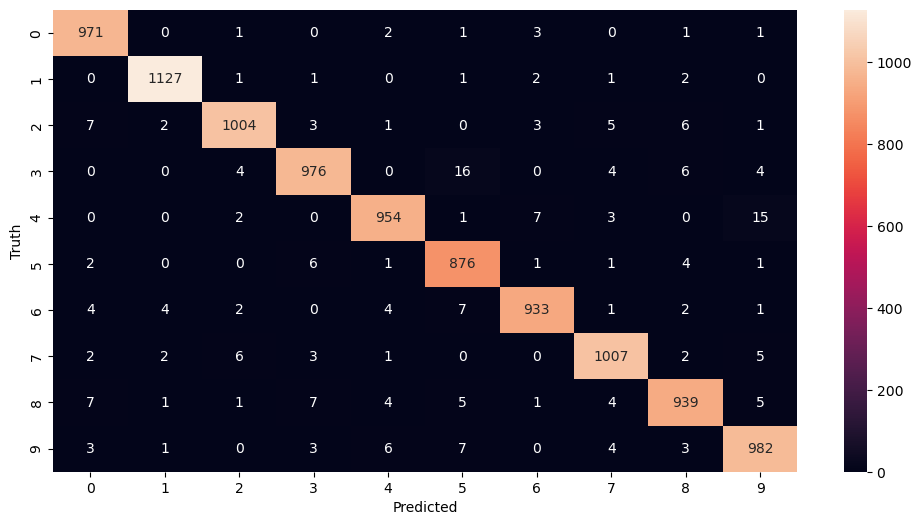

In [112]:
cm = tf.math.confusion_matrix(labels=y_test,predictions = new_pred_con)
plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')